## Introduction 

In this competition, we are asked to predict the price that an item sold for given its description and some other data on category, brand name, and condition. There are a very limited number of features and so this competition will likely come down to modelling the unstructured description text. 

## Libraries

Let's begin by loading the libraries that we will need. 


In [1]:
library(data.table)
library(magrittr)
library(ggplot2)
library(scales)
library(stringr)
library(quanteda)
library(gridExtra)

quanteda version 1.0.0
Using 3 of 4 threads for parallel computing

Attaching package: 'quanteda'

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View



In [2]:
dtrain <- fread('input/train.tsv', showProgress = FALSE)

dim(dtrain)

print(object.size(dtrain), units = 'Mb')

head(dtrain)

[1] 1482535       8

417.3 Mb


train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,Leather Horse Statues,1,Home/Home D茅cor/Home D茅cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


## Target Variable Analysis (Price) 
Let's start with an analysis of the target variable: price. First, the range of item prices:

In [3]:
range(dtrain$price)

[1]    0 2009

The item price ranges from 0 (I guess some items on Mercari are given away?) to $2009. Let's look at the histogram of prices. Because price is likely skewed and because there are some 0s, we'll plot the log of price + 1. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


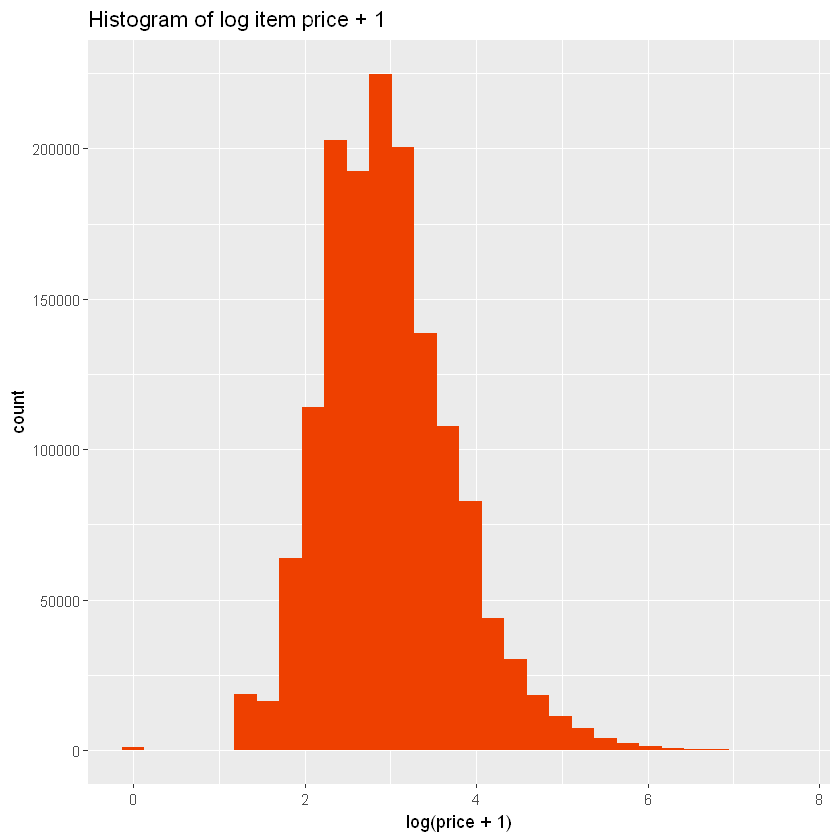

In [4]:
ggplot(data = dtrain, aes(x = log(price+1))) + 
    geom_histogram(fill = 'orangered2') +
    labs(title = 'Histogram of log item price + 1')